### Objective- To build decision tree  and find the survival cases.

In [2]:
#Importing the necessary library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [4]:
#Importing the dataset.
dataset=pd.read_csv("train.csv")
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,45.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dataset.shape

(889, 12)

**Interperation**
1. There are **889** observation and **12** variable
2. The Variable **PassengerId, Name, Cabin, Ticket** can be dropped wrt the problem statement.
3. Survived is our Dependent or Target variable. The remaining are the independent variable.
4. The Categorical variable **Sex, Embarked** Can be converted to numeric.


In [7]:
dataset1=dataset.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)
dataset1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
#cheching for null value
dataset1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
#The Statistical analysis
dataset1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,32.699854,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.346821,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,45.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [11]:
#Changing the categorical variable to numeric variable.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset1["Sex"]=le.fit_transform(dataset1["Sex"])
dataset1["Embarked"]=le.fit_transform(dataset1["Embarked"])
dataset1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,2
885,1,1,0,19.0,0,0,30.0000,2
886,0,3,0,45.0,1,2,23.4500,2
887,1,1,1,26.0,0,0,30.0000,0


**Interperation**
1. After dropping the columns the dataset conatins **889** observation and **8** variables.
2. No null value is present.

### Exploratory Data Analysis.

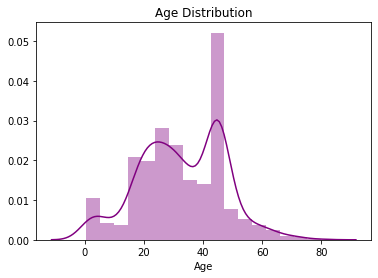

In [15]:
#Plotting the age distribution
sn.distplot(dataset1["Age"], color="purple")
plt.title("Age Distribution")
plt.show();

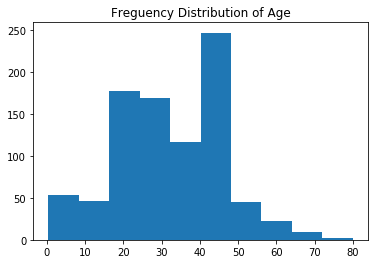

In [17]:
plt.hist(dataset1["Age"])
plt.title("Freguency Distribution of Age")
plt.show();

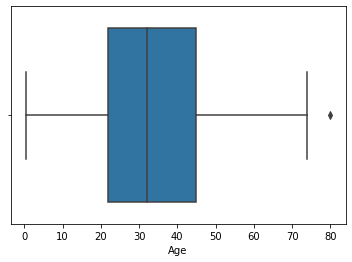

In [18]:
sn.boxplot(dataset1["Age"])

In [22]:
dataset1.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [83]:
dataset1.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [23]:
a=pd.crosstab(dataset1.Survived,dataset1.Sex)
a

Sex,0,1
Survived,,
0,81,468
1,231,109


In [24]:
dataset1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.106261,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.223279,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.103776,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.106261,-0.223279,0.103776,1.000000,-0.201741,-0.214245,0.037581,-0.091000
SibSp,-0.034040,0.081656,-0.116348,-0.201741,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.214245,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.037581,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.091000,0.068900,0.040449,-0.226311,1.000000


In [13]:
#Splitting the data.
y=dataset1.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [14]:
x=dataset1.drop(["Survived"], axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [25]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=1)

In [67]:
#Building the Model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [51]:
#Decision Tree
dt=DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5)
dt.fit(x_train,y_train)
dtpred=dt.predict(x_test)
#accuracy score
acc=accuracy_score(y_test,dtpred)*100
print("Accuracy Score",acc)
cal=classification_report(y_test,dtpred)
print("The classification report", cal)
con=confusion_matrix(y_test,dtpred)
print("Confusion matrix")
print(con)

Accuracy Score 85.65022421524664
The classification report               precision    recall  f1-score   support

           0       0.84      0.94      0.89       138
           1       0.88      0.72      0.79        85

    accuracy                           0.86       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.86      0.85       223

Confusion matrix
[[130   8]
 [ 24  61]]


In [84]:
rf=RandomForestClassifier(n_estimators=90, criterion='entropy',random_state=26,max_depth=5)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
#Accuracy Score
ac= accuracy_score(y_test,rf_pred)*100
print("Accuracy score",ac)
#Classification report
ca=classification_report(y_test,rf_pred)
print(ca)
#confusion matrix
conf=confusion_matrix(y_test,rf_pred)
print(conf)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy score 83.40807174887892
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       138
           1       0.83      0.71      0.76        85

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

[[126  12]
 [ 25  60]]


In [73]:
#plotting the decision tree
dt1=tree.DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=5)
dt1=dt1.fit(x,y)

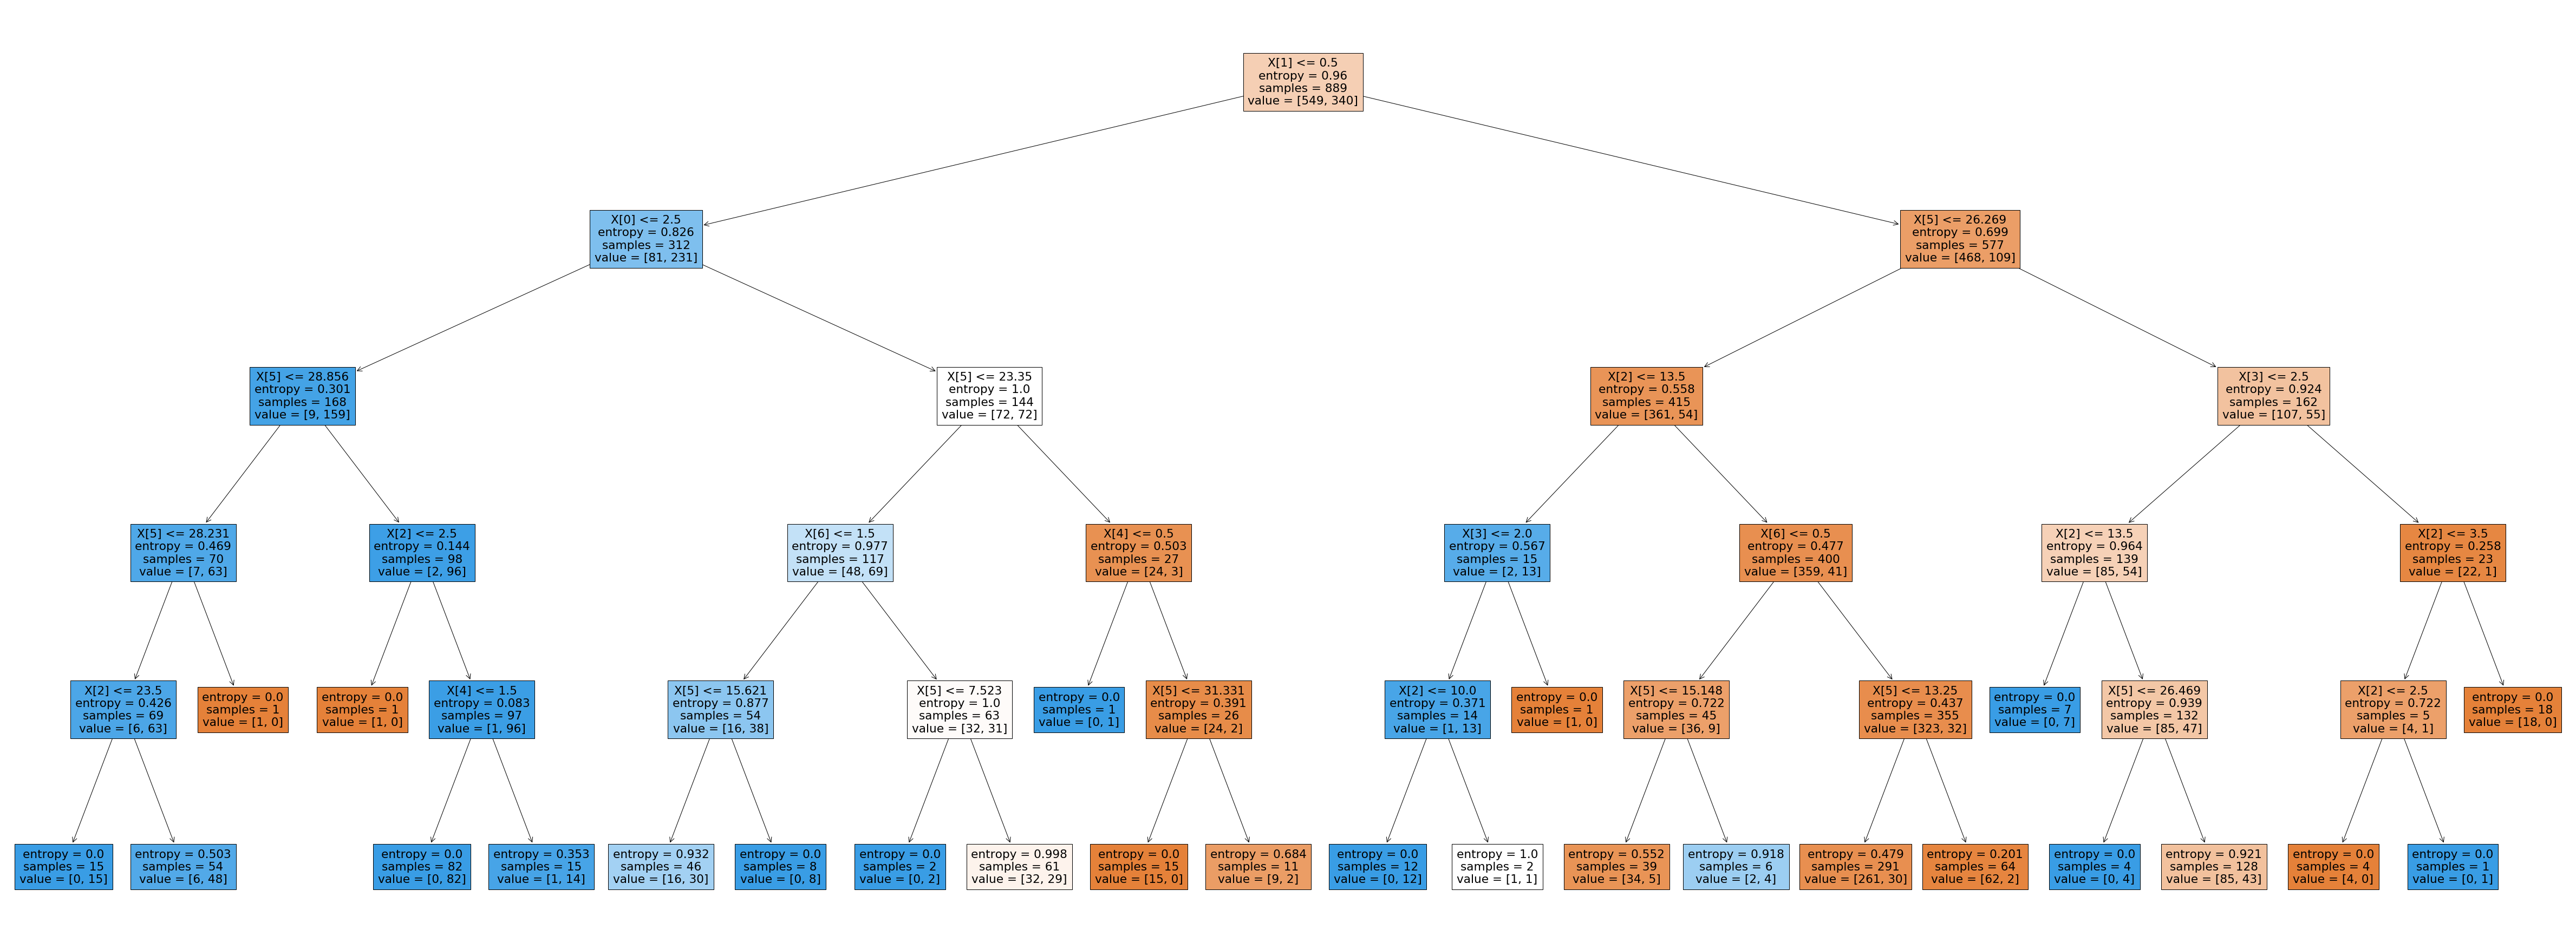

In [82]:
plt.figure(figsize=(85,32))
tree.plot_tree(dt1,filled=True)
plt.show();

 Inference-
 1. The Decision Tree model is **85.64%** accurate on predecting the survival cases.